In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sg

In [2]:
dat1 = nc.Dataset("/glade/derecho/scratch/nreilly/Input1_year1.nc","r")
dat2 = nc.Dataset("/glade/derecho/scratch/nreilly/Input2_year1.nc","r")
dat3 = nc.Dataset("/glade/derecho/scratch/nreilly/Input3_year1.nc","r")
dat4 = nc.Dataset("/glade/derecho/scratch/nreilly/Input4_year1.nc","r")

In [10]:
for lvl in range(dat1.dimensions["lev"].size):
    print(lvl, "\t", dat1.variables["lev"][lvl])

0 	 5.960300031304655e-06
1 	 9.826900182474674e-06
2 	 1.6201850527863826e-05
3 	 2.671225107775399e-05
4 	 4.404100018007284e-05
5 	 7.261274781455995e-05
6 	 0.00011971900093499244
7 	 0.00019738000389679655
8 	 0.0003254225049431625
9 	 0.0005365325108641628
10 	 0.0008846024854847201
11 	 0.001458457461467333
12 	 0.0024045749569268082
13 	 0.003978249878855422
14 	 0.006556825610459782
15 	 0.010813825610966887
16 	 0.01789799989637686
17 	 0.029557750167441554
18 	 0.04873074976785574
19 	 0.07991075108293444
20 	 0.12827324826503173
21 	 0.19811999663943425
22 	 0.29202500445535406
23 	 0.41016750037670135
24 	 0.5534699885174632
25 	 0.7304799801204354
26 	 0.9559475001879036
27 	 1.2447949848137796
28 	 1.6128499992191792
29 	 2.0793249714188278
30 	 2.6674249675124884
31 	 3.4048750530928373
32 	 4.324574954807758
33 	 5.465399939566851
34 	 6.872850004583597
35 	 8.59972508624196
36 	 10.70705009624362
37 	 13.264750130474567
38 	 16.35175058618188
39 	 20.056750625371933
4

In [3]:
height = 48       # corresponds to 103 hPa
ugw = dat3.variables["UTGWORO"][:,height,:,:] + dat3.variables["UTGWSPEC"][:,height,:,:] + dat4.variables["BUTGWSPEC"][:,height,:,:]

In [3]:
nbins = 100
height = 48       # corresponds to 103 hPa
ugw = dat3.variables["UTGWORO"][:,height,:,:] + dat3.variables["UTGWSPEC"][:,height,:,:] + dat4.variables["BUTGWSPEC"][:,height,:,:]
counts100,bins100 = np.histogram(ugw,bins=nbins)
nn = np.size(ugw)
counts100 = np.log10(counts100/nn)
height = 44      # corresponds to 49 hPa
ugw = dat3.variables["UTGWORO"][:,height,:,:] + dat3.variables["UTGWSPEC"][:,height,:,:] + dat4.variables["BUTGWSPEC"][:,height,:,:]
counts50,bins50 = np.histogram(ugw,bins=nbins)
counts50 = np.log10(counts50/nn)
height = 36      # corresponds to 10 hPa
ugw = dat3.variables["UTGWORO"][:,height,:,:] + dat3.variables["UTGWSPEC"][:,height,:,:] + dat4.variables["BUTGWSPEC"][:,height,:,:]
counts10,bins10 = np.histogram(ugw,bins=nbins)
counts10 = np.log10(counts10/nn)

/glade/derecho/scratch/nreilly/tmp/ipykernel_14519/433274597.py:6: RuntimeWarning: divide by zero encountered in log10
  counts100 = np.log10(counts100/nn)
/glade/derecho/scratch/nreilly/tmp/ipykernel_14519/433274597.py:10: RuntimeWarning: divide by zero encountered in log10
  counts50 = np.log10(counts50/nn)
/glade/derecho/scratch/nreilly/tmp/ipykernel_14519/433274597.py:14: RuntimeWarning: divide by zero encountered in log10
  counts10 = np.log10(counts10/nn)


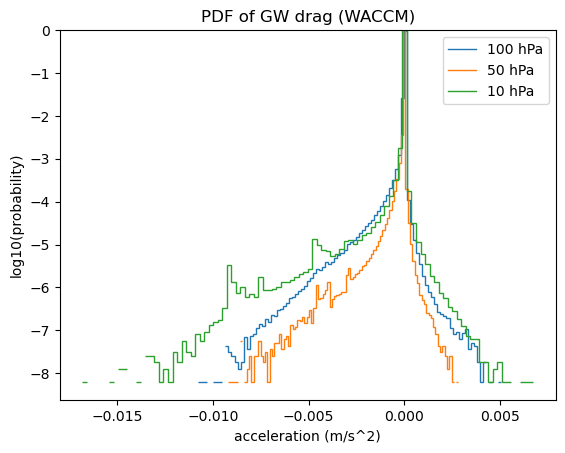

In [7]:
plt.stairs(counts100,bins100,baseline=None)
plt.stairs(counts50,bins50,baseline=None)
plt.stairs(counts10,bins10,baseline=None)
plt.xlabel("acceleration (m/s^2)")
plt.ylabel("log10(probability)")
plt.legend(["100 hPa", "50 hPa", "10 hPa"])
plt.title("PDF of GW drag (WACCM)");

In [21]:
ugw.shape

(2920, 192, 288)

In [17]:
ugw_std = np.std(ugw,0)

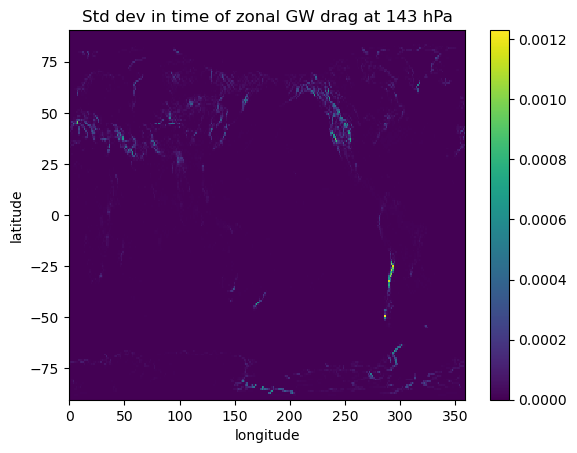

In [21]:
plt.pcolormesh(dat1.variables["lon"][:], dat1.variables["lat"][:],ugw_std)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title("Std dev in time of zonal GW drag at 143 hPa")
plt.colorbar();

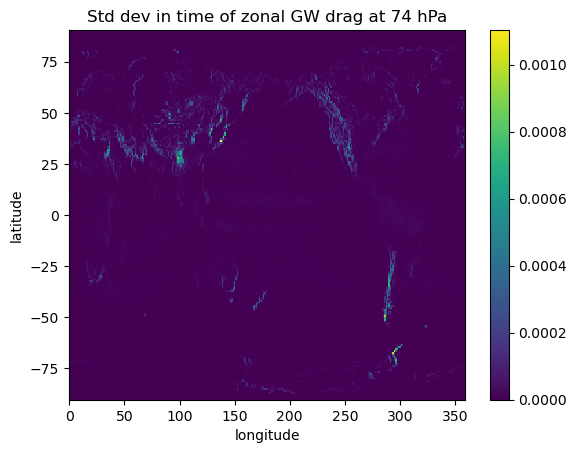

In [25]:
plt.pcolormesh(dat1.variables["lon"][:], dat1.variables["lat"][:],ugw_std)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title("Std dev in time of zonal GW drag at 74 hPa")
plt.colorbar();

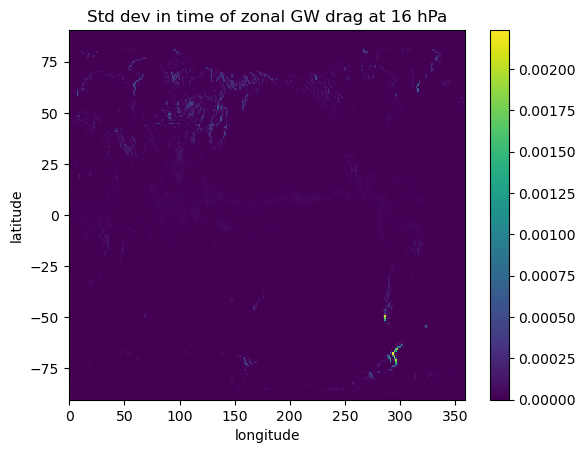

In [29]:
plt.pcolormesh(dat1.variables["lon"][:], dat1.variables["lat"][:],ugw_std)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title("Std dev in time of zonal GW drag at 16 hPa")
plt.colorbar();

In [18]:
col_ugw = dat3.variables["UTGWORO"][:,:,59,232] + dat3.variables["UTGWSPEC"][:,:,59,232] + dat4.variables["BUTGWSPEC"][:,:,59,232]

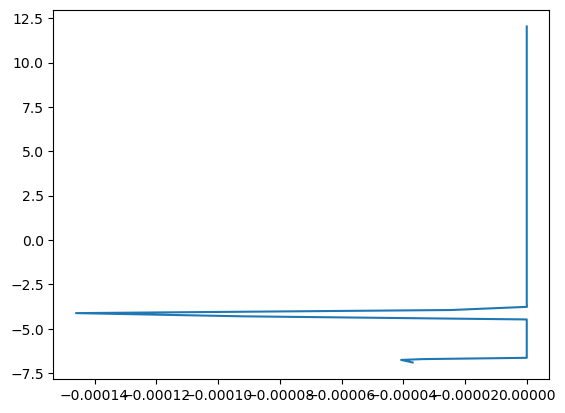

In [13]:
plt.plot(col_ugw[94,:],-np.log(dat1.variables["lev"][:]))

In [19]:
ntim = col_ugw.shape[0]
nlev = col_ugw.shape[1]
col_ugw = np.expand_dims(col_ugw, axis=2)
ugw_col_corr = np.mean(col_ugw*col_ugw.reshape(ntim, 1, nlev),axis=0)
corr_diag = np.expand_dims(np.array([np.sqrt(ugw_col_corr[i,i]) for i in range(nlev)]),axis=1)
ugw_col_corr /= corr_diag
ugw_col_corr /= corr_diag.T

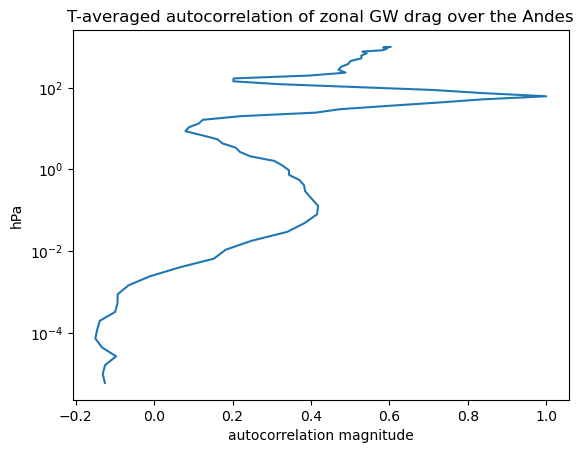

In [21]:
plt.semilogy(ugw_col_corr[45,:],dat1.variables["lev"][:])
plt.ylabel("hPa")
plt.xlabel("autocorrelation magnitude")
plt.title("T-averaged autocorrelation of zonal GW drag over the Andes");

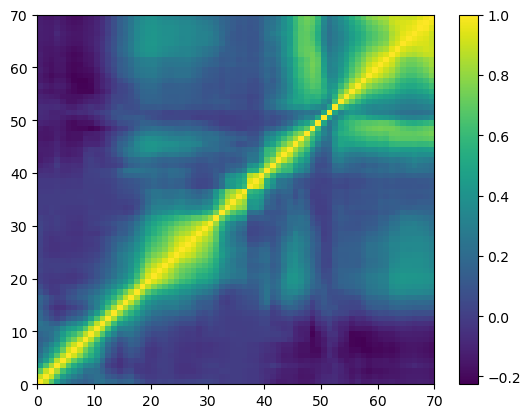

In [24]:
plt.pcolormesh(ugw_col_corr)
plt.colorbar();

In [4]:
nlon = dat1.dimensions["lon"].size
nlat = dat1.dimensions["lat"].size
nlev = dat1.dimensions["lev"].size
ntim = dat1.dimensions["time"].size
print(nlon," ",nlat," ",nlev," ",ntim)

288   192   70   2920


In [4]:
# SMALL LOOP
# UGW is 90GB, so I still need to chop it up in order to FFT-correlate it
ys = 8      # Y stride
nchunks = nlat//ys
ugw_col_corr = np.zeros(2*nlev-1)
for j in range(nchunks):
    ugw = dat3.variables["UTGWORO"][:,:,j*ys:(j+1)*ys,:] + dat3.variables["UTGWSPEC"][:,:,j*ys:(j+1)*ys,:] + dat4.variables["BUTGWSPEC"][:,:,j*ys:(j+1)*ys,:]
    tmp = sg.fftconvolve(ugw,ugw[:,::-1,:,:],"full",axes=1)        # autocorrelation is a self-convolution with the axis in question flipped
    ugw_col_corr += np.mean(tmp,axis=(0,2,3))/nchunks

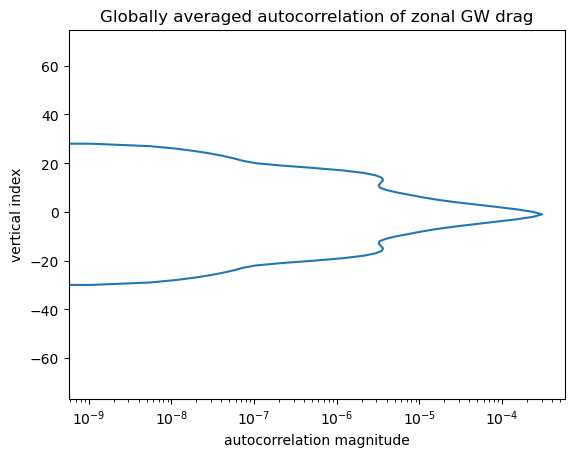

In [5]:
plt.semilogx(ugw_col_corr,np.arange(-nlev,nlev-1))
plt.ylabel("vertical index")
plt.xlabel("autocorrelation magnitude")
plt.title("Globally averaged autocorrelation of zonal GW drag");

In [8]:
for lvl in range(nlat):
    print(lvl, "\t", dat1.variables["lat"][lvl])

0 	 -90.0
1 	 -89.05759162303664
2 	 -88.1151832460733
3 	 -87.17277486910994
4 	 -86.2303664921466
5 	 -85.28795811518324
6 	 -84.3455497382199
7 	 -83.40314136125654
8 	 -82.46073298429319
9 	 -81.51832460732984
10 	 -80.57591623036649
11 	 -79.63350785340315
12 	 -78.69109947643979
13 	 -77.74869109947645
14 	 -76.80628272251309
15 	 -75.86387434554973
16 	 -74.92146596858639
17 	 -73.97905759162303
18 	 -73.03664921465969
19 	 -72.09424083769633
20 	 -71.15183246073298
21 	 -70.20942408376963
22 	 -69.26701570680629
23 	 -68.32460732984293
24 	 -67.38219895287958
25 	 -66.43979057591623
26 	 -65.49738219895288
27 	 -64.55497382198953
28 	 -63.61256544502618
29 	 -62.67015706806283
30 	 -61.72774869109948
31 	 -60.78534031413612
32 	 -59.84293193717278
33 	 -58.90052356020942
34 	 -57.95811518324607
35 	 -57.01570680628272
36 	 -56.07329842931937
37 	 -55.13089005235602
38 	 -54.18848167539267
39 	 -53.24607329842932
40 	 -52.303664921465966
41 	 -51.361256544502616
42 	 -50.4188481

In [22]:
for lvl in range(nlon):
    print(lvl, "\t", dat1.variables["lon"][lvl])

0 	 0.0
1 	 1.25
2 	 2.5
3 	 3.75
4 	 5.0
5 	 6.25
6 	 7.5
7 	 8.75
8 	 10.0
9 	 11.25
10 	 12.5
11 	 13.75
12 	 15.0
13 	 16.25
14 	 17.5
15 	 18.75
16 	 20.0
17 	 21.25
18 	 22.5
19 	 23.75
20 	 25.0
21 	 26.25
22 	 27.5
23 	 28.75
24 	 30.0
25 	 31.25
26 	 32.5
27 	 33.75
28 	 35.0
29 	 36.25
30 	 37.5
31 	 38.75
32 	 40.0
33 	 41.25
34 	 42.5
35 	 43.75
36 	 45.0
37 	 46.25
38 	 47.5
39 	 48.75
40 	 50.0
41 	 51.25
42 	 52.5
43 	 53.75
44 	 55.0
45 	 56.25
46 	 57.5
47 	 58.75
48 	 60.0
49 	 61.25
50 	 62.5
51 	 63.75
52 	 65.0
53 	 66.25
54 	 67.5
55 	 68.75
56 	 70.0
57 	 71.25
58 	 72.5
59 	 73.75
60 	 75.0
61 	 76.25
62 	 77.5
63 	 78.75
64 	 80.0
65 	 81.25
66 	 82.5
67 	 83.75
68 	 85.0
69 	 86.25
70 	 87.5
71 	 88.75
72 	 90.0
73 	 91.25
74 	 92.5
75 	 93.75
76 	 95.0
77 	 96.25
78 	 97.5
79 	 98.75
80 	 100.0
81 	 101.25
82 	 102.5
83 	 103.75
84 	 105.0
85 	 106.25
86 	 107.5
87 	 108.75
88 	 110.0
89 	 111.25
90 	 112.5
91 	 113.75
92 	 115.0
93 	 116.25
94 	 117.5
95 	 1

In [ ]:
s = 36      # Ystride
nchunks = nlon//s
ugw_col_corr = np.zeros((nlev, nlev))
for j in range(nchunks):
    print(j)
    ugw = dat3.variables["UTGWORO"][:,:,85:106,j*s:(j+1)*s] + dat3.variables["UTGWSPEC"][:,:,85:106,j*s:(j+1)*s] + dat4.variables["BUTGWSPEC"][:,:,85:106,j*s:(j+1)*s]
    ugw = np.expand_dims(ugw,axis=2)
    tmp = np.mean(ugw*ugw.reshape(ntim,1,nlev,21,s),axis=(0,3,4))
    ugw_col_corr += tmp/nchunks
    tmp = None

0


In [6]:
# spatial correlation with point at coordinates [59, 232]
pt_vec = ugw[:,59,232]
spat_corr_pt = np.sum(ugw*np.expand_dims(pt_vec,axis=(1,2)),axis=0)
spat_corr_pt /= spat_corr_pt[59,232]

In [8]:
dat1.variables["lat"][59]

masked_array(data=-34.39790576,
             mask=False,
       fill_value=1e+20)

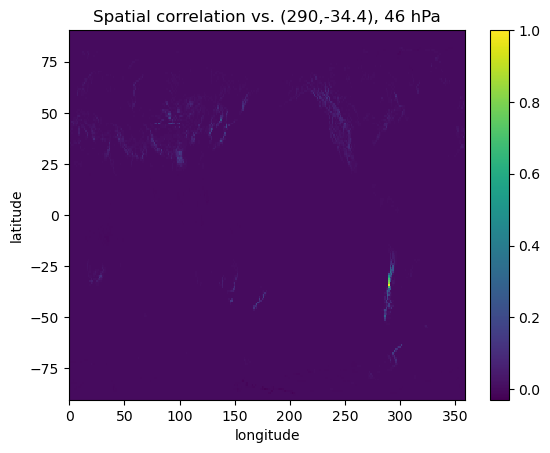

In [15]:
plt.pcolormesh(dat1.variables["lon"][:], dat1.variables["lat"][:],spat_corr_pt)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title("Spatial correlation vs. (290,-34.4), 46 hPa");
plt.colorbar();

/glade/derecho/scratch/nreilly/tmp/ipykernel_46389/1475144814.py:1: RuntimeWarning: divide by zero encountered in log
  plt.pcolormesh(dat1.variables["lon"][:], dat1.variables["lat"][:],np.log(spat_corr_pt))
/glade/derecho/scratch/nreilly/tmp/ipykernel_46389/1475144814.py:1: RuntimeWarning: invalid value encountered in log
  plt.pcolormesh(dat1.variables["lon"][:], dat1.variables["lat"][:],np.log(spat_corr_pt))


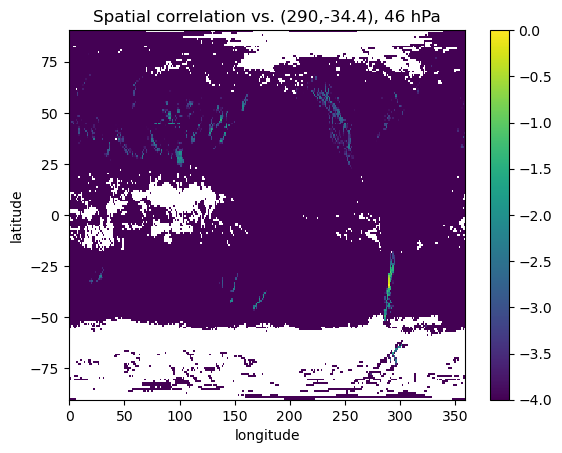

In [14]:
plt.pcolormesh(dat1.variables["lon"][:], dat1.variables["lat"][:],np.log(spat_corr_pt))
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title("Spatial correlation vs. (290,-34.4), 46 hPa");
plt.clim(-4,0);
plt.colorbar();

In [3]:
zcorr = nc.Dataset("waccm-zcorr.nc","r")

In [6]:
ugw_zcorr = zcorr.variables["zcorr"][:]
corr_diag = np.expand_dims(np.array([np.sqrt(ugw_zcorr[i,i]) for i in range(nlev)]),axis=1)
ugw_zcorr /= corr_diag
ugw_zcorr /= corr_diag.T

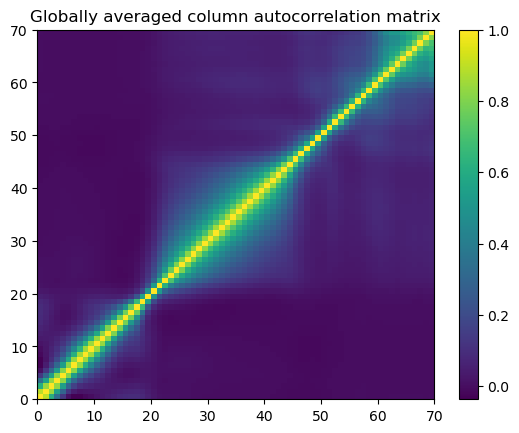

In [7]:
plt.pcolormesh(ugw_zcorr)
plt.title("Globally averaged column autocorrelation matrix");
plt.colorbar();

In [3]:
R = 287    # J/kg K
T = 230    # K
g = 9.98   # m/s^2
z = 1e-3*R*T/g * np.log(1000/dat1.variables["lev"][:])

In [5]:
R*T/g

6614.228456913827

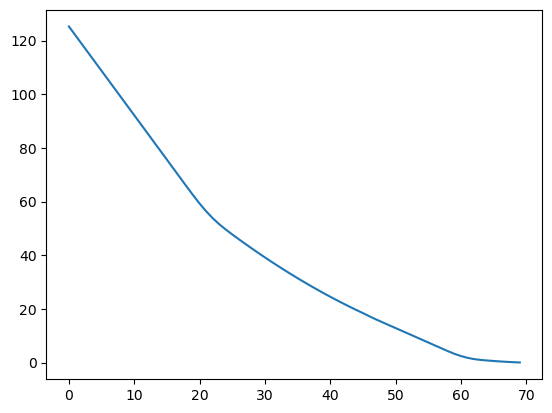

In [6]:
plt.plot(z)

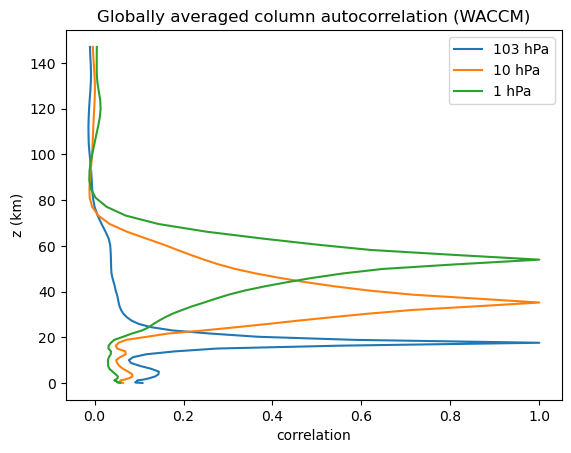

In [23]:
plt.plot(ugw_zcorr[48,:],z)
plt.plot(ugw_zcorr[36,:],z)
plt.plot(ugw_zcorr[26,:],z)
plt.legend(["103 hPa", "10 hPa", "1 hPa"])
plt.xlabel("correlation")
plt.ylabel("z (km)")
plt.title("Globally averaged column autocorrelation (WACCM)");

In [22]:
# temporal autocorrelation
yb = 85        # -10 lat
ye = 106       # 10 lat
hts = range(19,55)
tcorr = np.zeros((2*ntim-1,len(hts)))
for hidx in range(len(hts)):
    height = hts[hidx]
    ugw = dat3.variables["UTGWORO"][:,height,yb:ye,:] + dat3.variables["UTGWSPEC"][:,height,yb:ye,:] + dat4.variables["BUTGWSPEC"][:,height,yb:ye,:]
    tcorr[:,hidx] = np.mean(sg.fftconvolve(ugw,np.flip(ugw,axis=0),"full",axes=0),axis=(1,2))
tcorr /= tcorr[2919,:]

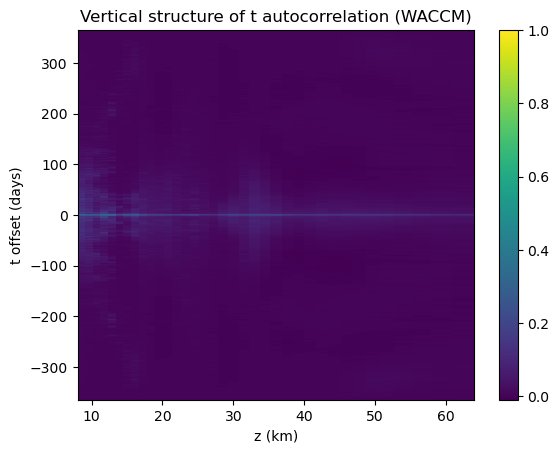

In [24]:
dt = 0.125 # timestep is 3hrs
plt.pcolormesh(z[19:55], np.arange(-ntim+1,ntim)*dt, tcorr)
plt.xlabel("z (km)")
plt.ylabel("t offset (days)")
plt.title("Vertical structure of t autocorrelation (WACCM)")
plt.colorbar();

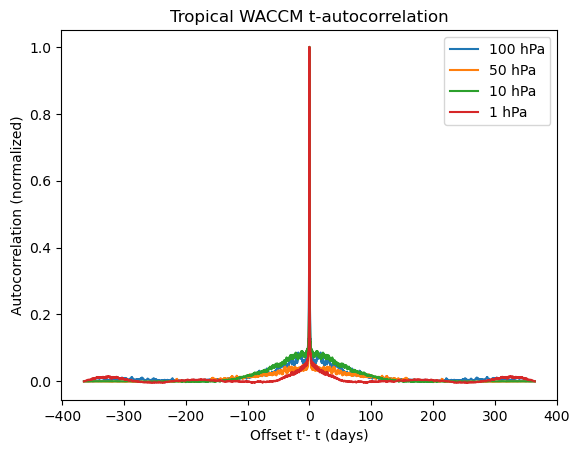

In [25]:
dt = 0.125 # timestep is 3hrs
plt.plot(np.arange(-ntim+1,ntim)*dt,tcorr[:,48-21])
plt.plot(np.arange(-ntim+1,ntim)*dt,tcorr[:,44-21])
plt.plot(np.arange(-ntim+1,ntim)*dt,tcorr[:,36-21])
plt.plot(np.arange(-ntim+1,ntim)*dt,tcorr[:,26-21])
plt.xlabel("Offset t'- t (days)")
plt.ylabel("Autocorrelation (normalized)")
plt.legend(["100 hPa", "50 hPa", "10 hPa", "1 hPa"])
plt.title("Tropical WACCM t-autocorrelation");

In [7]:
nx = 24        # 30 degrees
dt = 0.125     # tstep = 3hr
nt = int(4/dt) # 4 days
nsamples = 100
xb = np.random.randint(0,nlon-nx,nsamples)
xe = xb+nx
yb = 85        # -10 lat
ye = 106       # 10 lat
tb = np.random.randint(0,ntim-nt,nsamples)
te = tb+nt
ugw_small = np.zeros((nt,nlev,ye-yb,nx,nsamples))
for i in range(nsamples):
    print(i)
    ugw_small[:,:,:,:,i] = dat3.variables["UTGWORO"][tb[i]:te[i],:,yb:ye,xb[i]:xe[i]] + \
        dat3.variables["UTGWSPEC"][tb[i]:te[i],:,yb:ye,xb[i]:xe[i]] + \
        dat4.variables["BUTGWSPEC"][tb[i]:te[i],:,yb:ye,xb[i]:xe[i]]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [9]:
tcorr = np.mean(sg.fftconvolve(ugw_small,np.flip(ugw_small,axis=0),"full",axes=0),axis=(2,3))
tcorr /= tcorr[nt-1,:,:]

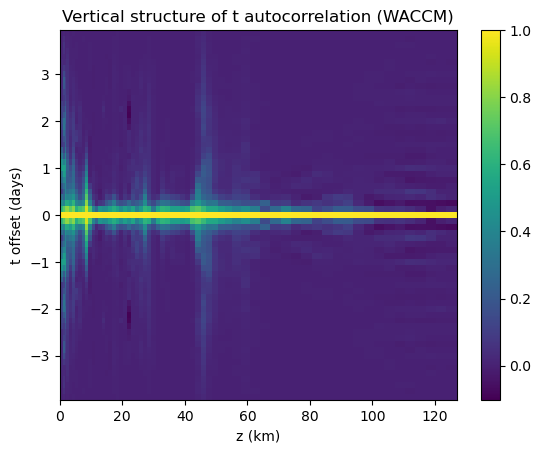

In [16]:
dt = 0.125 # timestep is 3hrs
plt.pcolormesh(z, np.arange(tb-te+1,te-tb)*dt, tcorr)
plt.xlabel("z (km)")
plt.ylabel("t offset (days)")
plt.title("Vertical structure of t autocorrelation (WACCM)")
plt.colorbar();

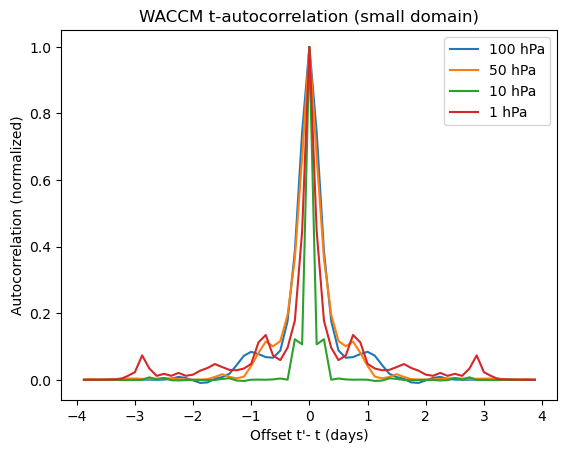

In [16]:
t_ax = np.arange(-nt+1,nt)*dt
idx = np.random.randint(0,nsamples)
plt.plot(t_ax,tcorr[:,48,idx])
plt.plot(t_ax,tcorr[:,44,idx])
plt.plot(t_ax,tcorr[:,36,idx])
plt.plot(t_ax,tcorr[:,26,idx])
plt.xlabel("Offset t'- t (days)")
plt.ylabel("Autocorrelation (normalized)")
plt.legend(["100 hPa", "50 hPa", "10 hPa", "1 hPa"])
plt.title("WACCM t-autocorrelation (small domain)");

In [19]:
t_ax = np.arange(-nt+1,nt)*dt
mean_tcorr = np.mean(tcorr,axis=2)
q25_tcorr = np.quantile(tcorr,0.25,axis=2)
q75_tcorr = np.quantile(tcorr,0.75,axis=2)

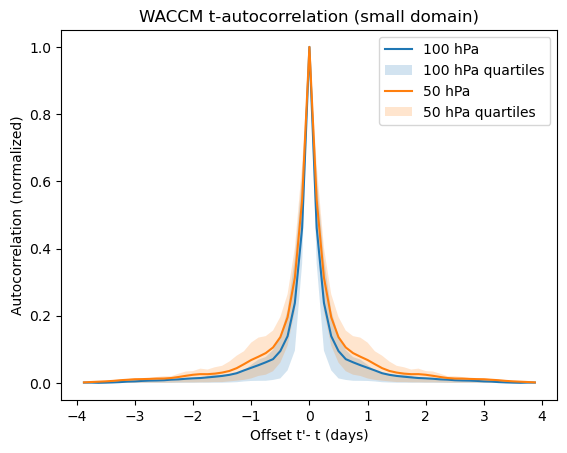

In [20]:
fig,ax = plt.subplots()
ax.plot(t_ax,mean_tcorr[:,48])
ax.fill_between(t_ax, q25_tcorr[:,48], q75_tcorr[:,48], alpha=0.2)
ax.plot(t_ax,mean_tcorr[:,44])
ax.fill_between(t_ax, q25_tcorr[:,44], q75_tcorr[:,44], alpha=0.2)
plt.xlabel("Offset t'- t (days)")
plt.ylabel("Autocorrelation (normalized)")
plt.legend(["100 hPa", "100 hPa quartiles", "50 hPa", "50 hPa quartiles"])
plt.title("WACCM t-autocorrelation (small domain)");

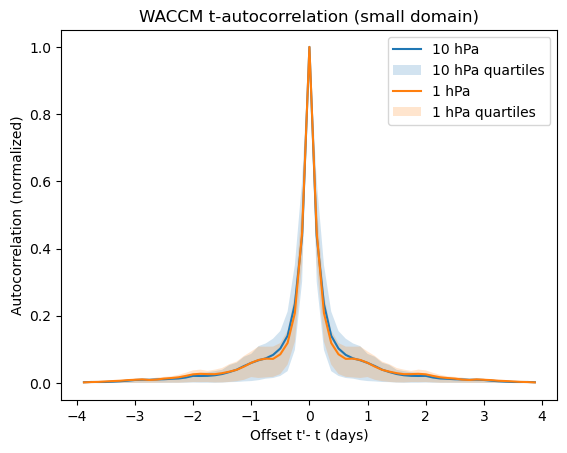

In [21]:
fig,ax = plt.subplots()
ax.plot(t_ax,mean_tcorr[:,36])
ax.fill_between(t_ax, q25_tcorr[:,36], q75_tcorr[:,36], alpha=0.2)
ax.plot(t_ax,mean_tcorr[:,26])
ax.fill_between(t_ax, q25_tcorr[:,26], q75_tcorr[:,26], alpha=0.2)
plt.xlabel("Offset t'- t (days)")
plt.ylabel("Autocorrelation (normalized)")
plt.legend(["10 hPa", "10 hPa quartiles", "1 hPa", "1 hPa quartiles"])
plt.title("WACCM t-autocorrelation (small domain)");

In [5]:
zcorrt = nc.Dataset("waccm-zcorr-tropical.nc","r")
ugw_zcorrt = zcorrt.variables["zcorr"][:]
corr_diag = np.expand_dims(np.array([np.sqrt(ugw_zcorrt[i,i]) for i in range(nlev)]),axis=1)
ugw_zcorrt /= corr_diag
ugw_zcorrt /= corr_diag.T

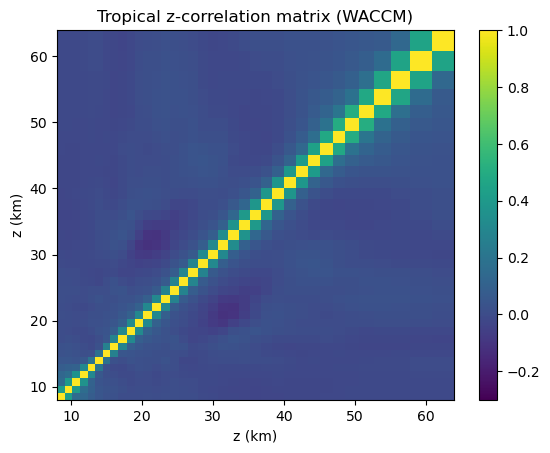

In [21]:
zb = 19
ze = 55
plt.pcolormesh(z[zb:ze],z[zb:ze],ugw_zcorrt[zb:ze,zb:ze],vmin=-0.3,vmax=1.0)
plt.xlabel("z (km)")
plt.ylabel("z (km)")
plt.title("Tropical z-correlation matrix (WACCM)");
plt.colorbar();

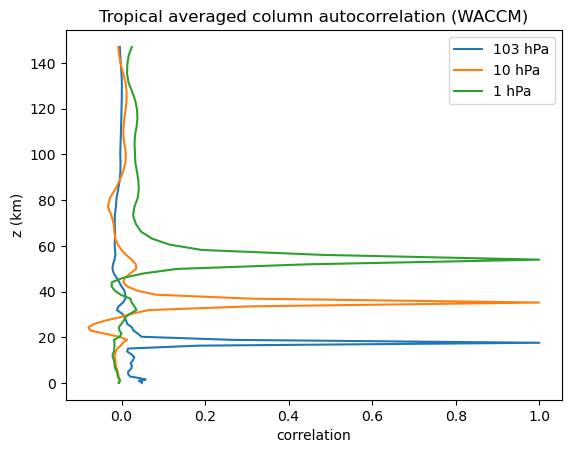

In [8]:
plt.plot(ugw_zcorrt[48,:],z)
plt.plot(ugw_zcorrt[36,:],z)
plt.plot(ugw_zcorrt[26,:],z)
plt.legend(["103 hPa", "10 hPa", "1 hPa"])
plt.xlabel("correlation")
plt.ylabel("z (km)")
plt.title("Tropical averaged column autocorrelation (WACCM)");

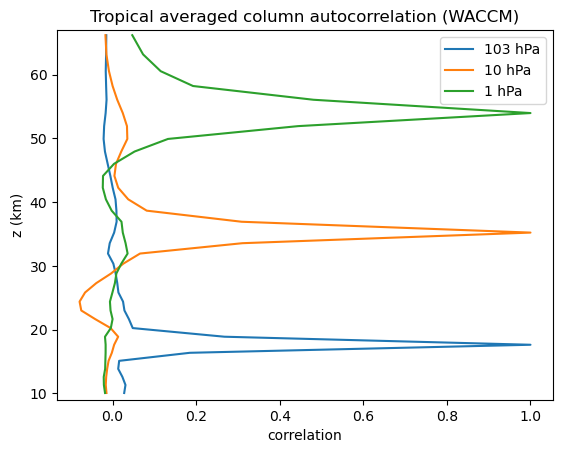

In [16]:
zb = 21
ze = 55
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(ugw_zcorrt[48,zb:ze],z[zb:ze])
ax.plot(ugw_zcorrt[36,zb:ze],z[zb:ze])
ax.plot(ugw_zcorrt[26,zb:ze],z[zb:ze])
ax.legend(["103 hPa", "10 hPa", "1 hPa"])
plt.xlabel("correlation")
plt.ylabel("z (km)")
ax.set_ylim(9,67)
plt.title("Tropical averaged column autocorrelation (WACCM)");

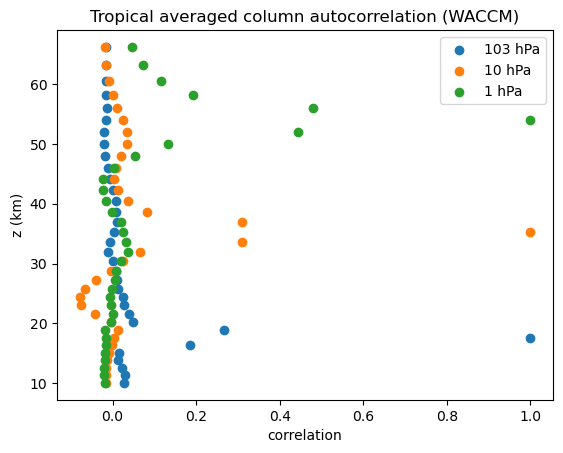

In [15]:
zb = 21
ze = 55
plt.scatter(ugw_zcorrt[48,zb:ze],z[zb:ze])
plt.scatter(ugw_zcorrt[36,zb:ze],z[zb:ze])
plt.scatter(ugw_zcorrt[26,zb:ze],z[zb:ze])
plt.legend(["103 hPa", "10 hPa", "1 hPa"])
plt.xlabel("correlation")
plt.ylabel("z (km)")
plt.title("Tropical averaged column autocorrelation (WACCM)");